# Advanced Quality Analysis Example

In [1]:
from IPython.display import display, HTML
display(HTML('<a target="_blank" href="https://colab.research.google.com/github/WaterFutures/EPyT-Flow/blob/main/docs/examples/net2-cl2_example.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>'))

Example of running an advanced quality analysis of Cl2 in Net2 using EPANET-MSX -- more information on how to run advanced quality analysis using EPANET-MSX can be found in the [documentation](https://epyt-flow.readthedocs.io/en/stable/tut.quality.html#advanced-quality-analysis).

In [2]:
%pip install epyt-flow --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
from epyt_flow.simulation import ScenarioSimulator
from epyt_flow.visualization import ScenarioVisualizer, black_colors
from epyt_flow.utils import to_seconds

Create a new scenario for chlorine analysis in the [Net2 network](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.data.html#epyt_flow.data.networks.load_net2):

In [4]:
scenario = ScenarioSimulator(f_inp_in="net2-cl2.inp", f_msx_in="net2-cl2.msx")

Set simulation duration to five days:

In [5]:
scenario.set_general_parameters(simulation_duration=to_seconds(days=5))

Monitor the "CL2" bulk species at every node by calling [set_bulk_species_node_sensors()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.scenario_simulator.ScenarioSimulator.set_bulk_species_node_sensors):

In [6]:
scenario.set_bulk_species_node_sensors(sensor_info={"CL2": scenario.sensor_config.nodes})

Run the entire simulation:

In [7]:
scada_data = scenario.run_simulation()

Show "CL2" concentration at the 11th node over the entire simulation:

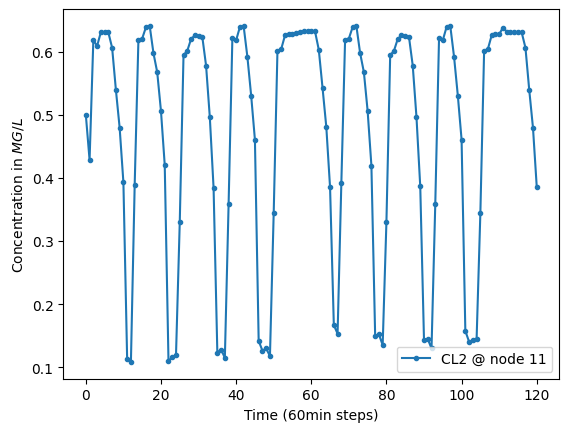

<Axes: xlabel='Time (60min steps)', ylabel='Concentration in $MG/L$'>

In [8]:
scada_data.plot_bulk_species_node_concentration({"CL2": [scenario.sensor_config.nodes[10]]})

In [9]:
from IPython.display import HTML
import warnings

warnings.filterwarnings('ignore')
scenario.place_bulk_species_node_sensors_everywhere(['CL2'])
vis = ScenarioVisualizer(scenario, color_scheme=black_colors)
vis.color_nodes(parameter='bulk_species_concentration', species='CL2', use_sensor_data=True, statistic='time_step', pit=(0, 60))
anim = vis.show_animation(return_animation=True, duration=10)
HTML(anim.to_jshtml(fps=15))

<Figure size 640x480 with 0 Axes>

Do not forget to close the simulation!

In [10]:
scenario.close()